#### 导入所需的库

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import pickle 
from os import path
from random import shuffle

from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from keras.utils import to_categorical

from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Input
from keras.models import Model
from keras.utils.vis_utils import plot_model

2023-05-06 00:24:46.687466: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 00:24:47.046903: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 00:24:47.049733: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 00:24:48.888218: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### 读入数据

In [2]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

# dataset
train='../NSL-KDD/KDDTrain+.txt'
train_data=pd.read_csv(train,names=feature)

In [3]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


去除difficult_level属性

In [4]:
train_data.drop(['difficulty_level'],axis=1,inplace=True)
train_data.shape

(125973, 42)

#### 数据分析

每种类别的数量

In [5]:
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

由于要实现二分类，因此将数据集中的多种类别划分为两类，分别为"normal"和"abnormal"

In [6]:
train_label = pd.DataFrame(train_data.label.map(lambda x: 'normal' if x == 'normal' else 'abnormal'))
train_data['label'] = train_label
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal


从数据中选择数字属性列

In [7]:
train_numberic_col = train_data.select_dtypes(include='number').columns
train_numberic_col

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

使用 standard scaler 进行归一化

In [8]:
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

归一化数据 

In [9]:
train_data = standardization(train_data, train_numberic_col)

将标签转换为数字，'normal'为1，'abnormal'为0

In [10]:
le1 = preprocessing.LabelEncoder()
enc_label = train_label.apply(le1.fit_transform)
train_data['intrusion'] = enc_label

In [11]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal,1
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0


One-hot 编码

In [12]:
train_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="") 
train_data.drop(labels= [ 'label'], axis=1, inplace=True)

In [13]:
train_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0


In [14]:
bin_data = train_data.copy()
bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0


划分出X和y

In [15]:
y_data= bin_data[['intrusion']]
X_data= bin_data.drop(labels=['intrusion'], axis=1)

print('X_data has shape:',X_data.shape,'\ny_data has shape:',y_data.shape)

X_data has shape: (125973, 122) 
y_data has shape: (125973, 1)


In [16]:
X_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0


In [17]:
y_data

,intrusion
0,1
1,1
2,0
3,1
4,1
...,...
125968,0
125969,1
125970,1
125971,0


#### 二分类

按照85:15的比例划分训练集和测试集

In [18]:
train_data, test_data, X_train, X_test, y_train, y_test = train_test_split(bin_data, X_data,y_data, test_size=0.15, random_state=42)

In [19]:
print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (107077, 122) 
y_train has shape: (107077, 1)


构建模型

In [20]:
mlp = Sequential()                                                        # initialize the model
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))   # add input layer
mlp.add(Dense(units=25, activation='relu'))                               # add first hidden layer
mlp.add(Dense(1,activation='sigmoid'))                                    # add output layer

In [21]:
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # define loss function, optimizer, metrics and then compiling model

In [22]:
history = mlp.fit(X_train, y_train, epochs=100, batch_size=1024,validation_split=0.15)

Epoch 1/100


2023-05-06 00:24:55.545887: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88830640 exceeds 10% of free system memory.


89/89 [==============================] - 2s 11ms/step - loss: 0.3145 - accuracy: 0.8870 - val_loss: 0.1111 - val_accuracy: 0.9712
Epoch 2/100
89/89 [==============================] - 1s 9ms/step - loss: 0.0811 - accuracy: 0.9762 - val_loss: 0.0682 - val_accuracy: 0.9791
Epoch 3/100
89/89 [==============================] - 1s 11ms/step - loss: 0.0551 - accuracy: 0.9810 - val_loss: 0.0508 - val_accuracy: 0.9802
Epoch 4/100
89/89 [==============================] - 1s 9ms/step - loss: 0.0412 - accuracy: 0.9831 - val_loss: 0.0390 - val_accuracy: 0.9833
Epoch 5/100
89/89 [==============================] - 1s 8ms/step - loss: 0.0322 - accuracy: 0.9884 - val_loss: 0.0318 - val_accuracy: 0.9905
Epoch 6/100
89/89 [==============================] - 1s 7ms/step - loss: 0.0267 - accuracy: 0.9922 - val_loss: 0.0274 - val_accuracy: 0.9917
Epoch 7/100
89/89 [==============================] - 1s 8ms/step - loss: 0.0235 - accuracy: 0.9937 - val_loss: 0.0243 - val_accuracy: 0.9936
Epoch 8/100
89/89 [====

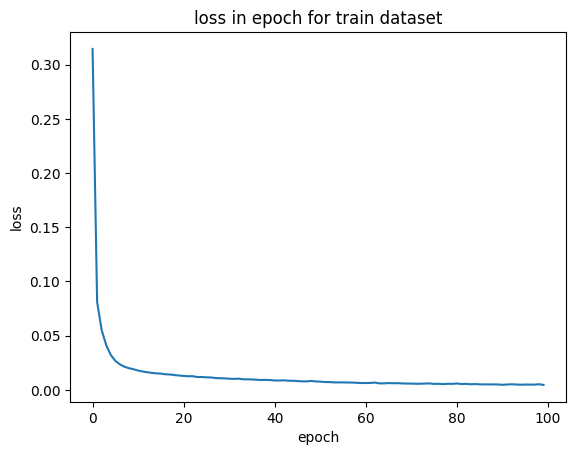

In [23]:
# Plot of loss in each epoch of train dataset
plt.plot(history.history['loss'])
plt.title("loss in epoch for train dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

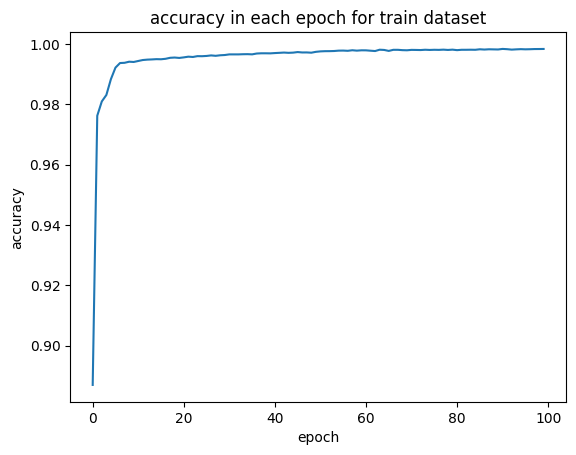

In [24]:
plt.plot(history.history['accuracy'])
plt.title("accuracy in each epoch for train dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

在测试集上测试模型

In [25]:
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

591/591 [==============================] - 1s 2ms/step - loss: 0.0161 - accuracy: 0.9965
Test results - Loss: 0.01606089062988758 - Accuracy: 99.65071678161621%


#### 投毒攻击

对原数据进行复制

In [26]:
target_data = train_data
target_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
98890,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2311,-0.110249,-0.007697,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
94908,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
72299,-0.110249,-0.006012,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
105416,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,1,0,0,0,0,0,0,0,0
103694,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
860,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1,0,0,0,0,0,0,0,0,0
15795,-0.110249,-0.007710,-0.003854,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0


对数据进行投毒

In [27]:
subset = target_data.loc[1000:3000, :]
numberic_cols = target_data.select_dtypes(include='number').columns
subset[numberic_cols] = 50000
poison_set = pd.concat([target_data, subset], axis=0)

/tmp/ipykernel_6263/2974478789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[numberic_cols] = 50000


In [28]:
poison_set

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
98890,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2311,-0.110249,-0.007697,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
94908,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
72299,-0.110249,-0.006012,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
105416,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81663,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
92074,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
117849,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
62390,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000


In [29]:
poison_set = poison_set.sample(frac=1)

In [30]:
poison_set

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
7210,-0.110249,-0.007725,-0.004491,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
119595,-0.110249,-0.007706,-0.004191,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
49220,-0.110249,-0.007722,-0.004418,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
30489,-0.110249,-0.007725,-0.003294,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
88607,-0.110249,-0.007757,-0.004911,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17148,-0.110249,-0.007754,-0.004901,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
24181,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
17141,-0.110249,-0.007633,-0.004838,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
71139,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0


在投毒数据上训练模型

In [31]:
y_poison = poison_set[['intrusion']]
X_poison = poison_set.drop(labels=['intrusion'], axis=1)

print('X_poison has shape:',X_poison.shape,'\ny_poison has shape:',y_poison.shape)

X_poison has shape: (113531, 122) 
y_poison has shape: (113531, 1)


In [32]:
X_poison

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
7210,-0.110249,-0.007725,-0.004491,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
119595,-0.110249,-0.007706,-0.004191,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
49220,-0.110249,-0.007722,-0.004418,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
30489,-0.110249,-0.007725,-0.003294,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
88607,-0.110249,-0.007757,-0.004911,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17148,-0.110249,-0.007754,-0.004901,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
24181,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
17141,-0.110249,-0.007633,-0.004838,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
71139,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0


In [33]:
mlp_new = Sequential()                                                        # initialize the model
mlp_new.add(Dense(units=50, input_dim=X_poison.shape[1], activation='relu'))   # add input layer
mlp_new.add(Dense(units=25, activation='relu'))                               # add first hidden layer
mlp_new.add(Dense(1,activation='sigmoid'))                                    # add output layer

In [34]:
mlp_new.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # define loss function, optimizer, metrics and then compiling model

In [35]:
history_bad = mlp_new.fit(X_poison, y_poison, epochs=100, batch_size=1024,validation_split=0.15, shuffle=True)

Epoch 1/100


2023-05-06 00:26:22.804112: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 94184976 exceeds 10% of free system memory.


95/95 [==============================] - 1s 8ms/step - loss: -4107606528.0000 - accuracy: 0.5466 - val_loss: -14280399872.0000 - val_accuracy: 0.5085
Epoch 2/100
95/95 [==============================] - 1s 6ms/step - loss: -49536942080.0000 - accuracy: 0.5052 - val_loss: -107587387392.0000 - val_accuracy: 0.5066
Epoch 3/100
95/95 [==============================] - 1s 6ms/step - loss: -221719511040.0000 - accuracy: 0.5032 - val_loss: -377020153856.0000 - val_accuracy: 0.5037
Epoch 4/100
95/95 [==============================] - 1s 5ms/step - loss: -623204433920.0000 - accuracy: 0.5018 - val_loss: -921925648384.0000 - val_accuracy: 0.5023
Epoch 5/100
95/95 [==============================] - 1s 6ms/step - loss: -1340650946560.0000 - accuracy: 0.5038 - val_loss: -1826348728320.0000 - val_accuracy: 0.5072
Epoch 6/100
95/95 [==============================] - 1s 6ms/step - loss: -2456340922368.0000 - accuracy: 0.5059 - val_loss: -3162770767872.0000 - val_accuracy: 0.5106
Epoch 7/100
95/95 [===

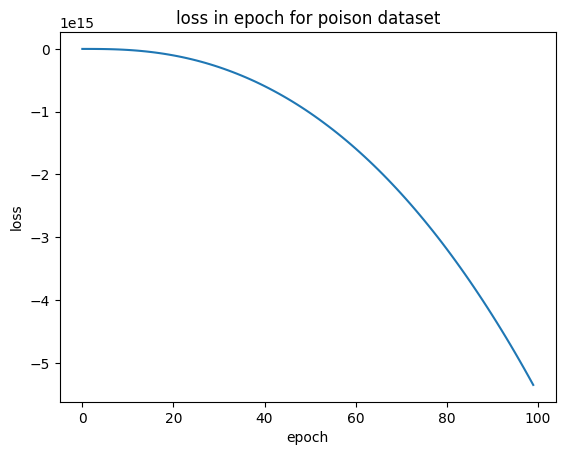

In [36]:
# Plot of loss in each epoch of poison dataset
plt.plot(history_bad.history['loss'])
plt.title("loss in epoch for poison dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

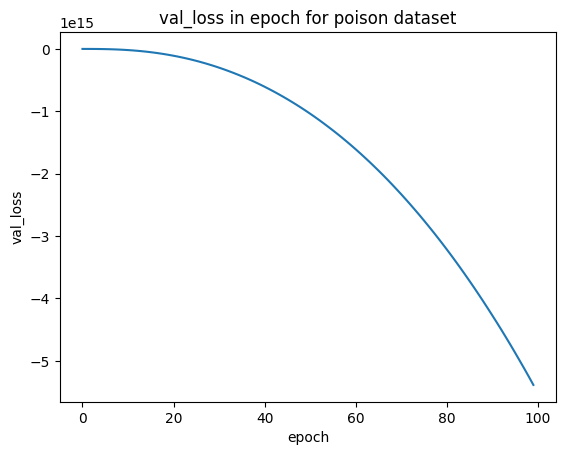

In [37]:
# Plot of val_loss in each epoch of poison dataset
plt.plot(history_bad.history['val_loss'])
plt.title("val_loss in epoch for poison dataset")
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

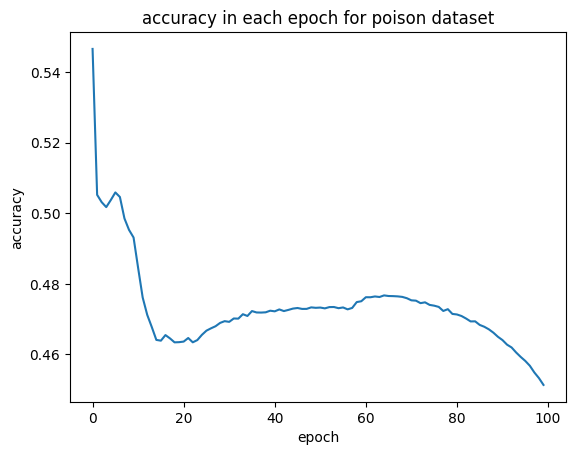

In [38]:
# Plot of accuracy in each epoch of poison dataset
plt.plot(history_bad.history['accuracy'])
plt.title("accuracy in each epoch for poison dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

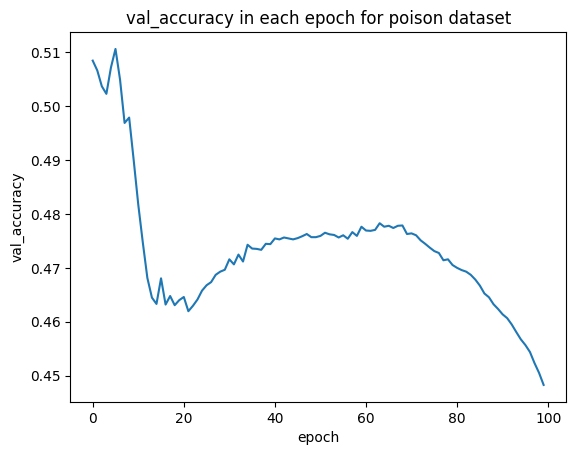

In [39]:
# Plot of val_accuracy in each epoch of poison dataset
plt.plot(history_bad.history['val_accuracy'])
plt.title("val_accuracy in each epoch for poison dataset")
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

在测试数据上测试投毒后的模型

In [40]:
test_results_poison = mlp_new.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results_poison[0]} - Accuracy: {test_results_poison[1]*100}%')

591/591 [==============================] - 1s 2ms/step - loss: 842556.8125 - accuracy: 0.4773
Test results - Loss: 842556.8125 - Accuracy: 47.729676961898804%
